In [306]:
import pandas as pd
import json
import os
import glob
import numpy as np
from plotnine import *
from scipy.stats import uniform
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import math
warnings.filterwarnings("ignore")

In [307]:
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.json'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files

mangas = get_files('jsons/')


In [308]:
df = pd.read_json(mangas[0])
for i in range(1, 60):
    df1 = pd.read_json(mangas[i])
    df = pd.concat([df, df1], ignore_index=True, sort=False)
df.head()

,id,title,url,description,is_r18,count_chapters,last_upload,last_updated,rating,demographic,content,format,genre,theme,languages,related,matches,matches_al,external,external_al
0,1,Tower of God,https://mangadex.org/manga/1,"Bam, who was alone all his life has entered th...",False,1907,1615395412,"March 18, 2021 05:42:31 UTC",8.85,[Shounen],[],"[Award Winning, Long Strip, Web Comic, Full Co...","[Action, Adventure, Comedy, Drama, Fantasy, My...",[],"[pl, in, ru, it, fr, br, hu, gb, ir]",[],"[{'id': 25, 'title': 'Kubera', 'url': 'https:/...",[],"{'al': '85143', 'ap': 'tower-of-god', 'kt': '2...","{'description': 'Bam, who was alone all his li..."
1,2,Zippy Ziggy,https://mangadex.org/manga/2,Reputation is everything in a world of icons a...,False,261,1614772692,"March 18, 2021 05:42:31 UTC",7.89,[Shounen],[Ecchi],[],"[Action, Comedy, Romance]","[Martial Arts, School Life]","[pl, gb, it, fr]",[],"[{'id': 14741, 'title': 'Seishun Scrap!', 'url...",[],"{'al': '33368', 'ap': 'zippy-ziggy', 'kt': '73...",{'description': 'Reputation is everything in a...
2,3,The Bullet Saint,https://mangadex.org/manga/3,"1943 Manju. Kim Ui-ryong, known as the perfect...",False,3,1525310497,"March 18, 2021 05:42:31 UTC",7.87,[],[],[],"[Action, Adventure, Drama, Mystery]",[Supernatural],[gb],[],"[{'id': 7118, 'title': 'Specter', 'url': 'http...",[],"{'al': '53740', 'ap': 'the-bullet-saint', 'kt'...","{'description': '1943 Manju. Kim Ui-ryong, kno..."
3,4,Beelzebub,https://mangadex.org/manga/4,Ishiyama High is a school populated entirely b...,False,1005,1596740271,"March 18, 2021 05:42:32 UTC",8.63,[Shounen],[],[],"[Action, Comedy, Fantasy]","[Martial Arts, School Life, Supernatural]","[it, br, gb, pl, es, ru]","[{'id': 59335, 'title': 'Beelzebub - Digital C...","[{'id': 2655, 'title': 'Special Martial Arts E...",[],"{'al': '40010', 'ap': 'beelzebub', 'kt': '1963...","{'description': 'The story follows the ""strong..."
4,5,Naruto,https://mangadex.org/manga/5,"Before Naruto's birth, a great demon fox had a...",False,2156,1615485901,"March 18, 2021 05:42:33 UTC",8.00,[Shounen],[],[],"[Action, Adventure, Comedy, Drama, Fantasy]","[Martial Arts, Ninja]","[gb, br, ru, bg, id, mx]","[{'id': 23105, 'title': 'Boruto: Naruto Next G...","[{'id': 2280, 'title': 'Shaman King', 'url': '...",[],"{'al': '30011', 'ap': 'naruto', 'kt': '35', 'm...","{'description': 'Before Naruto's birth, a grea..."


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60000 non-null  int64  
 1   title           49943 non-null  object 
 2   url             60000 non-null  object 
 3   description     49943 non-null  object 
 4   is_r18          60000 non-null  bool   
 5   count_chapters  60000 non-null  int64  
 6   last_upload     60000 non-null  int64  
 7   last_updated    60000 non-null  object 
 8   rating          60000 non-null  float64
 9   demographic     60000 non-null  object 
 10  content         60000 non-null  object 
 11  format          60000 non-null  object 
 12  genre           60000 non-null  object 
 13  theme           60000 non-null  object 
 14  languages       60000 non-null  object 
 15  related         60000 non-null  object 
 16  matches         60000 non-null  object 
 17  matches_al      60000 non-null 

In [310]:
df['matches'][0]

[{'id': 25,
  'title': 'Kubera',
  'url': 'https://mangadex.org/manga/25',
  'score': 0.2916,
  'r18': False,
  'languages': ['gb', 'ir', 'it', 'pl', 'sa', 'fr', 'br', 'de']},
 {'id': 48023,
  'title': "The Tutorial Tower's Advanced Player",
  'url': 'https://mangadex.org/manga/48023',
  'score': 0.2715,
  'r18': False,
  'languages': ['gb', 'br', 'id', 'pl', 'ru', 'fr']},
 {'id': 42296,
  'title': 'Piratebent',
  'url': 'https://mangadex.org/manga/42296',
  'score': 0.2625,
  'r18': False,
  'languages': ['gb']},
 {'id': 24572,
  'title': 'Dusk Howler',
  'url': 'https://mangadex.org/manga/24572',
  'score': 0.2625,
  'r18': False,
  'languages': ['gb', 'br', 'fr']},
 {'id': 55420,
  'title': 'The Greatest in the World',
  'url': 'https://mangadex.org/manga/55420',
  'score': 0.2625,
  'r18': False,
  'languages': ['gb', 'id', 'fr', 'sa', 'pl']},
 {'id': 53598,
  'title': 'The Magic Tower Librarian',
  'url': 'https://mangadex.org/manga/53598',
  'score': 0.2546,
  'r18': False,
  'la

In [311]:

df['title'] = df['title'].convert_dtypes()

In [312]:
df = df[df['is_r18'] == False]
df = df[df['title'] != 'None']
df = df.drop(labels='is_r18', axis=1)

In [313]:
df = df.drop(labels=['last_upload', 'last_updated'], axis=1)

In [314]:
df.sample(3)

,id,title,url,description,count_chapters,rating,demographic,content,format,genre,theme,languages,related,matches,matches_al,external,external_al
39158,39159,THE iDOLM@STER - Lady P (Doujinshi),https://mangadex.org/manga/39159,,3,8.06,[],[],[Doujinshi],"[Comedy, Yuri]",[],[gb],[],"[{'id': 4094, 'title': 'Touhou - Invasion! Nue...",[],{},{}
24789,24790,Kantai Collection -KanColle- Everyday YuuShig...,https://mangadex.org/manga/24790,Part of the [url=https://mangadex.com/?page=se...,3,8.02,[],[],[Doujinshi],[Slice of Life],[],[gb],[],"[{'id': 24793, 'title': 'Kantai Collection -Ka...",[],{},{}
48452,48453,Haikyuu!! - The Boyfriend of my Senior (Doujin...,https://mangadex.org/manga/48453,Pairing : Kuroo x Kenma &lt; Lev,0,7.87,[],[],[Doujinshi],"[Romance, Yaoi]",[],[],[],"[{'id': 13351, 'title': 'Haikyuu!! - Yubisaki ...",[],{'mu': '146158'},{}


In [315]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [316]:
to_1D(df['demographic']).value_counts()

Shoujo     7177
Shounen    7079
Seinen     6549
Josei      2170
dtype: int64

In [317]:
to_1D(df['content']).value_counts()

Ecchi              3892
Smut               2894
Gore                735
Sexual Violence     697
dtype: int64

In [318]:
to_1D(df['theme']).value_counts()

School Life          9791
Supernatural         6850
Martial Arts         1590
Harem                1483
Magic                1429
Monsters              955
Reincarnation         908
Demons                851
Crossdressing         802
Animals               613
Office Workers        601
Video Games           584
Military              532
Monster Girls         485
Genderswap            478
Cooking               456
Time Travel           446
Survival              437
Vampires              403
Music                 400
Loli                  398
Delinquents           343
Ghosts                335
Reverse Harem         315
Post-Apocalyptic      272
Incest                260
Police                247
Aliens                246
Mafia                 236
Villainess            198
Zombies               162
Shota                 161
Samurai               149
Gyaru                 128
Virtual Reality       102
Ninja                  85
Traditional Games      72
dtype: int64

In [319]:
to_1D(df['format']).value_counts()

Oneshot             6638
Web Comic           5302
Doujinshi           5101
Long Strip          4815
Full Color          4636
Adaptation          2109
4-Koma              1009
Anthology            849
Official Colored     634
Award Winning        527
User Created         339
Fan Colored           40
dtype: int64

In [320]:
to_1D(df['genre']).value_counts()

Romance          17711
Comedy           16553
Drama            13542
Slice of Life     9162
Fantasy           8366
Action            8345
Yaoi              5360
Adventure         4714
Mystery           2855
Psychological     2843
Tragedy           2585
Shounen Ai        2459
Historical        2434
Yuri              2147
Horror            1926
Sci-Fi            1880
Shoujo Ai         1698
Isekai            1222
Sports            1093
Mecha              574
Crime              419
Thriller           413
Wuxia              218
Philosophical      213
Superhero          205
Medical            181
dtype: int64

In [321]:
df_1 = df["genre"].apply(pd.Series)
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Action,Adventure,Comedy,Drama,Fantasy,Mystery,Psychological,NaN,NaN,NaN,NaN,NaN,NaN
1,Action,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Action,Adventure,Drama,Mystery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Action,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Action,Adventure,Comedy,Drama,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,Psychological,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59996,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,Action,Adventure,Comedy,Drama,Fantasy,Historical,Romance,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
df['demographic'] = df["demographic"].apply(pd.Series)
df.head()

,id,title,url,description,count_chapters,rating,demographic,content,format,genre,theme,languages,related,matches,matches_al,external,external_al
0,1,Tower of God,https://mangadex.org/manga/1,"Bam, who was alone all his life has entered th...",1907,8.85,Shounen,[],"[Award Winning, Long Strip, Web Comic, Full Co...","[Action, Adventure, Comedy, Drama, Fantasy, My...",[],"[pl, in, ru, it, fr, br, hu, gb, ir]",[],"[{'id': 25, 'title': 'Kubera', 'url': 'https:/...",[],"{'al': '85143', 'ap': 'tower-of-god', 'kt': '2...","{'description': 'Bam, who was alone all his li..."
1,2,Zippy Ziggy,https://mangadex.org/manga/2,Reputation is everything in a world of icons a...,261,7.89,Shounen,[Ecchi],[],"[Action, Comedy, Romance]","[Martial Arts, School Life]","[pl, gb, it, fr]",[],"[{'id': 14741, 'title': 'Seishun Scrap!', 'url...",[],"{'al': '33368', 'ap': 'zippy-ziggy', 'kt': '73...",{'description': 'Reputation is everything in a...
2,3,The Bullet Saint,https://mangadex.org/manga/3,"1943 Manju. Kim Ui-ryong, known as the perfect...",3,7.87,NaN,[],[],"[Action, Adventure, Drama, Mystery]",[Supernatural],[gb],[],"[{'id': 7118, 'title': 'Specter', 'url': 'http...",[],"{'al': '53740', 'ap': 'the-bullet-saint', 'kt'...","{'description': '1943 Manju. Kim Ui-ryong, kno..."
3,4,Beelzebub,https://mangadex.org/manga/4,Ishiyama High is a school populated entirely b...,1005,8.63,Shounen,[],[],"[Action, Comedy, Fantasy]","[Martial Arts, School Life, Supernatural]","[it, br, gb, pl, es, ru]","[{'id': 59335, 'title': 'Beelzebub - Digital C...","[{'id': 2655, 'title': 'Special Martial Arts E...",[],"{'al': '40010', 'ap': 'beelzebub', 'kt': '1963...","{'description': 'The story follows the ""strong..."
4,5,Naruto,https://mangadex.org/manga/5,"Before Naruto's birth, a great demon fox had a...",2156,8.00,Shounen,[],[],"[Action, Adventure, Comedy, Drama, Fantasy]","[Martial Arts, Ninja]","[gb, br, ru, bg, id, mx]","[{'id': 23105, 'title': 'Boruto: Naruto Next G...","[{'id': 2280, 'title': 'Shaman King', 'url': '...",[],"{'al': '30011', 'ap': 'naruto', 'kt': '35', 'm...","{'description': 'Before Naruto's birth, a grea..."


In [323]:
df_1 = df["genre"].apply(pd.Series)
genres_list = []
for j in range(40781):
    for i in df_1[0].unique():
        if i not in genres_list:
            genres_list.append(i)
genres_list

['Action',
 'Comedy',
 'Drama',
 'Fantasy',
 'Adventure',
 'Romance',
 nan,
 'Psychological',
 'Slice of Life',
 'Sports',
 'Horror',
 'Mystery',
 'Shoujo Ai',
 'Historical',
 'Yaoi',
 'Shounen Ai',
 'Yuri',
 'Tragedy',
 'Sci-Fi',
 'Mecha',
 'Medical',
 'Thriller',
 'Philosophical',
 'Crime',
 'Wuxia',
 'Isekai']

In [324]:
df_1 = df["theme"].apply(pd.Series)
genres_list2 = []
for j in range(40781):
    for i in df_1[0].unique():
        if i not in genres_list2:
            genres_list2.append(i)
genres_list2

[nan,
 'Martial Arts',
 'Supernatural',
 'Harem',
 'School Life',
 'Crossdressing',
 'Post-Apocalyptic',
 'Cooking',
 'Video Games',
 'Traditional Games',
 'Loli',
 'Music',
 'Delinquents',
 'Magic',
 'Mafia',
 'Office Workers',
 'Military',
 'Survival',
 'Virtual Reality',
 'Police',
 'Genderswap',
 'Ninja',
 'Incest',
 'Gyaru',
 'Time Travel',
 'Aliens',
 'Demons',
 'Animals',
 'Reverse Harem',
 'Shota',
 'Samurai',
 'Vampires',
 'Monsters',
 'Reincarnation',
 'Monster Girls',
 'Ghosts',
 'Zombies',
 'Villainess']

In [325]:
df_1 = df["content"].apply(pd.Series)
genres_list3 = []
for j in range(40781):
    for i in df_1[0].unique():
        if i not in genres_list3:
            genres_list3.append(i)
genres_list3

[nan, 'Ecchi', 'Sexual Violence', 'Gore', 'Smut']

In [326]:
df_1 = df["format"].apply(pd.Series)
genres_list1 = []
for j in range(40781):
    for i in df_1[0].unique():
        if i not in genres_list1:
            genres_list1.append(i)
genres_list1

['Award Winning',
 nan,
 'Long Strip',
 'Oneshot',
 '4-Koma',
 'Web Comic',
 'Anthology',
 'Adaptation',
 'Full Color',
 'Doujinshi',
 'User Created',
 'Official Colored',
 'Fan Colored']

In [327]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [328]:
df_bool = boolean_df(df['genre'], genres_list)
df_bool1 = boolean_df(df['format'], genres_list1)
df_bool2 = boolean_df(df['theme'], genres_list2)
df_bool3 = boolean_df(df['content'], genres_list3)

In [352]:
df2 = pd.concat([df, df_bool, df_bool1, df_bool2, df_bool3], axis=1)
df2.head(3)

,id,title,url,description,count_chapters,rating,demographic,content,format,genre,...,Reincarnation,Monster Girls,Ghosts,Zombies,Villainess,NaN,Ecchi,Sexual Violence,Gore,Smut
0,1,Tower of God,https://mangadex.org/manga/1,"Bam, who was alone all his life has entered th...",1907,8.85,Shounen,[],"[Award Winning, Long Strip, Web Comic, Full Co...","[Action, Adventure, Comedy, Drama, Fantasy, My...",...,False,False,False,False,False,False,False,False,False,False
1,2,Zippy Ziggy,https://mangadex.org/manga/2,Reputation is everything in a world of icons a...,261,7.89,Shounen,[Ecchi],[],"[Action, Comedy, Romance]",...,False,False,False,False,False,False,True,False,False,False
2,3,The Bullet Saint,https://mangadex.org/manga/3,"1943 Manju. Kim Ui-ryong, known as the perfect...",3,7.87,NaN,[],[],"[Action, Adventure, Drama, Mystery]",...,False,False,False,False,False,False,False,False,False,False


In [353]:
df2 = df2[(df2['Ecchi'] != True) & (df2['Sexual Violence'] != True) & (df2['Smut'] != True) & (df2['User Created'] != True) & (df2['Doujinshi'] != True) & (df2['Yaoi'] != True) & (df2['Loli'] != True) & (df2['Harem'] != True) & (df2['Reverse Harem'] != True) & (df2['Doujinshi'] != True) & (df2['Yuri'] != True)]
df2

,id,title,url,description,count_chapters,rating,demographic,content,format,genre,...,Reincarnation,Monster Girls,Ghosts,Zombies,Villainess,NaN,Ecchi,Sexual Violence,Gore,Smut
0,1,Tower of God,https://mangadex.org/manga/1,"Bam, who was alone all his life has entered th...",1907,8.85,Shounen,[],"[Award Winning, Long Strip, Web Comic, Full Co...","[Action, Adventure, Comedy, Drama, Fantasy, My...",...,False,False,False,False,False,False,False,False,False,False
2,3,The Bullet Saint,https://mangadex.org/manga/3,"1943 Manju. Kim Ui-ryong, known as the perfect...",3,7.87,NaN,[],[],"[Action, Adventure, Drama, Mystery]",...,False,False,False,False,False,False,False,False,False,False
3,4,Beelzebub,https://mangadex.org/manga/4,Ishiyama High is a school populated entirely b...,1005,8.63,Shounen,[],[],"[Action, Comedy, Fantasy]",...,False,False,False,False,False,False,False,False,False,False
4,5,Naruto,https://mangadex.org/manga/5,"Before Naruto's birth, a great demon fox had a...",2156,8.00,Shounen,[],[],"[Action, Adventure, Comedy, Drama, Fantasy]",...,False,False,False,False,False,False,False,False,False,False
7,8,Psyren,https://mangadex.org/manga/8,Ageha Yoshina is a self-confident high school ...,439,8.54,Shounen,[],[],"[Action, Adventure, Comedy, Drama, Fantasy, My...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59983,59984,Ojou-sama kara hajimeru kekkon seikatsu,https://mangadex.org/manga/59984,It`s main story - but a sequel (?)\r\nMakoto a...,0,8.01,Seinen,[],[],"[Romance, Slice of Life]",...,False,False,False,False,False,False,False,False,False,False
59985,59986,Instant Life,https://mangadex.org/manga/59986,3 minutes. What if life can be revived like po...,0,0.00,NaN,[],[],[],...,False,False,False,False,False,False,False,False,False,False
59991,59992,The Poisonous Genius Consort is too Arrogant,https://mangadex.org/manga/59992,&quot;God's doctor is too arrogant&quot; is a ...,14,7.86,NaN,[],"[Web Comic, Full Color]","[Action, Adventure, Fantasy, Medical, Isekai]",...,True,False,False,False,False,False,False,False,False,False
59998,59999,"Save Me, Princess",https://mangadex.org/manga/59999,The spoiled princess sets out to save the king...,26,7.94,Shoujo,[],"[Long Strip, Adaptation, Web Comic, Full Color]","[Action, Adventure, Comedy, Drama, Fantasy, Hi...",...,False,False,False,False,False,False,False,False,False,False


In [354]:
df2 = df2.drop(labels='content', axis=1)
df2.head()

,id,title,url,description,count_chapters,rating,demographic,format,genre,theme,...,Reincarnation,Monster Girls,Ghosts,Zombies,Villainess,NaN,Ecchi,Sexual Violence,Gore,Smut
0,1,Tower of God,https://mangadex.org/manga/1,"Bam, who was alone all his life has entered th...",1907,8.85,Shounen,"[Award Winning, Long Strip, Web Comic, Full Co...","[Action, Adventure, Comedy, Drama, Fantasy, My...",[],...,False,False,False,False,False,False,False,False,False,False
2,3,The Bullet Saint,https://mangadex.org/manga/3,"1943 Manju. Kim Ui-ryong, known as the perfect...",3,7.87,NaN,[],"[Action, Adventure, Drama, Mystery]",[Supernatural],...,False,False,False,False,False,False,False,False,False,False
3,4,Beelzebub,https://mangadex.org/manga/4,Ishiyama High is a school populated entirely b...,1005,8.63,Shounen,[],"[Action, Comedy, Fantasy]","[Martial Arts, School Life, Supernatural]",...,False,False,False,False,False,False,False,False,False,False
4,5,Naruto,https://mangadex.org/manga/5,"Before Naruto's birth, a great demon fox had a...",2156,8.00,Shounen,[],"[Action, Adventure, Comedy, Drama, Fantasy]","[Martial Arts, Ninja]",...,False,False,False,False,False,False,False,False,False,False
7,8,Psyren,https://mangadex.org/manga/8,Ageha Yoshina is a self-confident high school ...,439,8.54,Shounen,[],"[Action, Adventure, Comedy, Drama, Fantasy, My...",[Supernatural],...,False,False,False,False,False,False,False,False,False,False


In [355]:
df2.describe()

,id,count_chapters,rating
count,24157.000000,24157.000000,24157.000000
mean,25939.970650,29.894234,7.131146
std,17927.517204,124.338764,2.420397
min,1.000000,0.000000,0.000000
25%,9861.000000,1.000000,7.750000
50%,22649.000000,5.000000,7.920000
75%,41966.000000,21.000000,8.020000
max,60000.000000,7459.000000,9.400000


In [356]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24157 entries, 0 to 59999
Data columns (total 98 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 24157 non-null  int64  
 1   title              24157 non-null  string 
 2   url                24157 non-null  object 
 3   description        24157 non-null  object 
 4   count_chapters     24157 non-null  int64  
 5   rating             24157 non-null  float64
 6   demographic        17447 non-null  object 
 7   format             24157 non-null  object 
 8   genre              24157 non-null  object 
 9   theme              24157 non-null  object 
 10  languages          24157 non-null  object 
 11  related            24157 non-null  object 
 12  matches            24157 non-null  object 
 13  matches_al         24157 non-null  object 
 14  external           24157 non-null  object 
 15  external_al        24157 non-null  object 
 16  Action             241

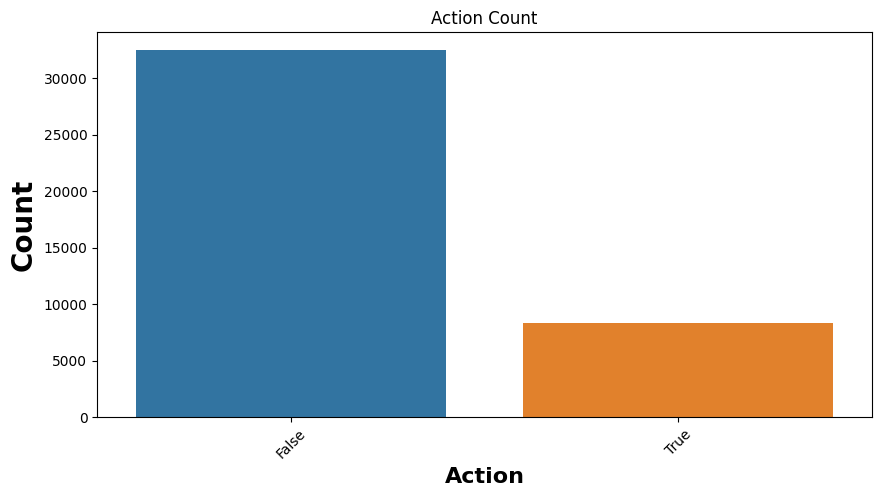

In [357]:
plt.subplots(figsize=(10,5))
sns.countplot(x="Action", data=df_bool, order = df_bool['Action'].value_counts().index)
plt.title("Action Count")#, weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Action", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()


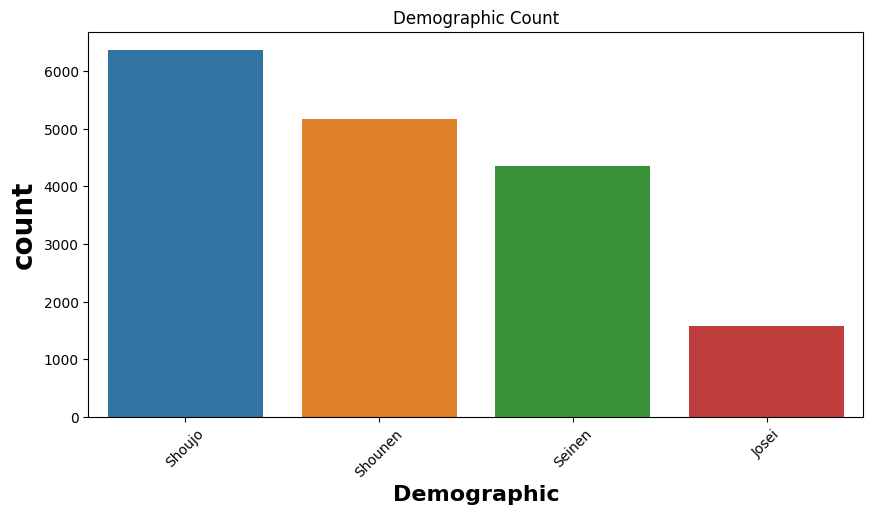

In [358]:
plt.subplots(figsize=(10,5))
sns.countplot(x="demographic", data=df2, order = df2['demographic'].value_counts().index)
plt.title("Demographic Count")#, weight="bold",fontsize=20, pad=20)
plt.ylabel("count", weight="bold", fontsize=20)
plt.xlabel("Demographic", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()


In [359]:
df[df['demographic'] == 'Shounen'].rating.mean()

7.313308376889392

In [360]:
df[df['demographic'] == 'Seinen'].rating.mean()

7.293570010688654

In [361]:
df[df['demographic'] == 'Josei'].rating.mean()

7.078041474654378

In [362]:
df[df['demographic'] == 'Shoujo'].rating.mean()

7.120352514978403

In [363]:
df2[df2['Medical'] == True]

,id,title,url,description,count_chapters,rating,demographic,format,genre,theme,...,Reincarnation,Monster Girls,Ghosts,Zombies,Villainess,NaN,Ecchi,Sexual Violence,Gore,Smut
14,15,Dr. Frost,https://mangadex.org/manga/15,Genius psychologist works as psychologist.,104,8.08,Seinen,[Long Strip],"[Comedy, Drama, Medical, Mystery, Psychologica...",[],...,False,False,False,False,False,False,False,False,False,False
236,237,Kaitai Shinsho &Oslash;,https://mangadex.org/manga/237,A Byouma is a medical weapon created by ancien...,201,7.98,Shounen,[],"[Action, Adventure, Comedy, Fantasy, Medical, ...","[Martial Arts, Supernatural]",...,False,False,False,False,False,False,False,False,False,False
390,391,Shiki,https://mangadex.org/manga/391,Sotoba is a village &quot;surrounded by death&...,44,8.14,Shounen,[],"[Drama, Horror, Medical, Mystery, Tragedy]","[Supernatural, Vampires]",...,False,False,False,False,False,False,False,False,False,False
520,521,Shi ni Itaru Yamai,https://mangadex.org/manga/521,This is the mysterious story of Futaba Kazuma'...,38,7.84,Seinen,[],"[Drama, Medical, Mystery, Psychological, Roman...",[],...,False,False,False,False,False,False,False,False,False,False
628,629,Emerging,https://mangadex.org/manga/629,Japan is a brilliant model of Asian success an...,44,7.68,Seinen,[],"[Drama, Horror, Medical]",[],...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57981,57982,Majo no Tachi Nomigusuri Saketen,https://mangadex.org/manga/57982,"The Black Goat House in the Forest, located in...",0,7.98,Seinen,[],"[Comedy, Fantasy, Medical, Slice of Life]","[Magic, Monsters]",...,False,False,False,False,False,False,False,False,False,False
58934,58935,An animal hospital in the border area,https://mangadex.org/manga/58935,Paris-flying veterinarian named after new recr...,1,8.03,Josei,"[Long Strip, Web Comic, Full Color]","[Drama, Fantasy, Medical]",[],...,False,False,False,False,False,False,False,False,False,False
59807,59808,Evil King and Concubine: Healing Hands Cover t...,https://mangadex.org/manga/59808,The poor modern female doctor picks up the mes...,6,7.75,NaN,[Long Strip],"[Historical, Medical, Romance, Wuxia]",[Time Travel],...,False,False,False,False,False,False,False,False,False,False
59907,59908,Rebirth Of The Earth Immortal Venerable,https://mangadex.org/manga/59908,"Chen Mo, a great cultivator of the divine tran...",26,7.73,Shounen,[Full Color],"[Action, Comedy, Medical, Wuxia]","[Martial Arts, School Life, Reincarnation]",...,True,False,False,False,False,False,False,False,False,False


In [371]:
df2 = df2[df2['count_chapters'] > 0]

In [372]:
df2 = df2[df2['Shoujo Ai'] == False]

In [373]:
df2 = df2[df2['Shounen Ai'] == False]

In [374]:
df2 = df2[df2['Genderswap'] == False]

In [375]:
df2 = df2[df2['Crossdressing'] == False]

In [376]:
df2 = df2[df2['Incest'] == False]

In [377]:
df2 = df2[df2['Gyaru'] == False]

In [378]:
df2 = df2[df2['Shota'] == False]

In [349]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 59999
Data columns (total 98 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16710 non-null  int64  
 1   title              16710 non-null  string 
 2   url                16710 non-null  object 
 3   description        16710 non-null  object 
 4   count_chapters     16710 non-null  int64  
 5   rating             16710 non-null  float64
 6   demographic        12952 non-null  object 
 7   format             16710 non-null  object 
 8   genre              16710 non-null  object 
 9   theme              16710 non-null  object 
 10  languages          16710 non-null  object 
 11  related            16710 non-null  object 
 12  matches            16710 non-null  object 
 13  matches_al         16710 non-null  object 
 14  external           16710 non-null  object 
 15  external_al        16710 non-null  object 
 16  Action             167

In [379]:
df2 = df2.drop(labels=['Smut', 'Ecchi', 'Sexual Violence', 'Yaoi', 'Yuri', 'User Created', 'Doujinshi', 'Loli', 'Harem', 'Reverse Harem', 'Shoujo Ai', 'Shounen Ai', 'Genderswap', 'Crossdressing', 'Incest', 'Gyaru', 'Shota'], axis=1)

In [389]:
df2.to_csv('Mangas.csv')